In [55]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [56]:
df = pd.read_csv('crop.csv')
df.head()

,word_freq_match,word_pair_match,trigram_match,sent_match,plag
0,83.888889,100.0,0.0,88.782051,0
1,80.303030,0.0,0.0,100.000000,1
2,85.897436,0.0,0.0,95.000000,0
3,81.250000,0.0,0.0,100.000000,1
4,100.000000,0.0,0.0,93.181818,0


In [57]:
df_plag1 = df[df.plag==1]
df_plag0 = df[df.plag==0]

In [58]:
df_plag1.head(3)

,word_freq_match,word_pair_match,trigram_match,sent_match,plag
1,80.303030,0.0,0.0,100.000,1
3,81.250000,0.0,0.0,100.000,1
7,91.666667,0.0,0.0,96.875,1


Text(0, 0.5, 'word_match_mean')

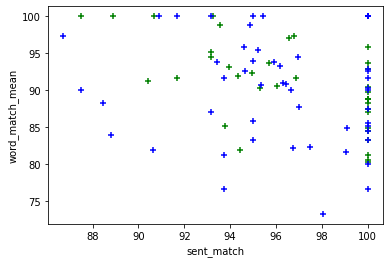

In [59]:
plt.scatter(df_plag1['sent_match'], df_plag1['word_freq_match'], color="green", marker="+")
plt.scatter(df_plag0['sent_match'], df_plag0['word_freq_match'], color="blue", marker="+")

plt.xlabel('sent_match')
plt.ylabel('word_match_mean')

Text(0, 0.5, 'word_match_mean')

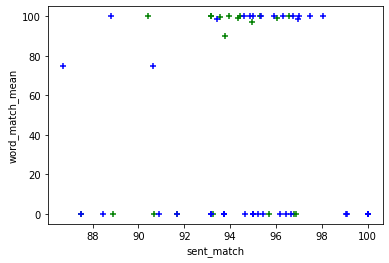

In [61]:
plt.scatter(df_plag1['sent_match'], df_plag1['word_pair_match'], color="green", marker="+")
plt.scatter(df_plag0['sent_match'], df_plag0['word_pair_match'], color="blue", marker="+")

plt.xlabel('sent_match')
plt.ylabel('word_match_mean')

Text(0, 0.5, 'word_match_mean')

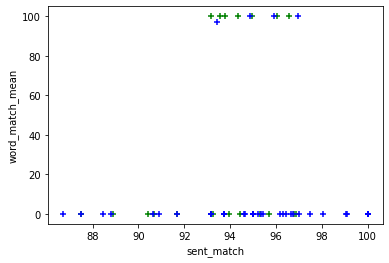

In [62]:
plt.scatter(df_plag1['sent_match'], df_plag1['trigram_match'], color="green", marker="+")
plt.scatter(df_plag0['sent_match'], df_plag0['trigram_match'], color="blue", marker="+")

plt.xlabel('sent_match')
plt.ylabel('word_match_mean')

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X = df.drop(['plag'], axis='columns')
X.head()

,word_freq_match,word_pair_match,trigram_match,sent_match
0,83.888889,100.0,0.0,88.782051
1,80.303030,0.0,0.0,100.000000
2,85.897436,0.0,0.0,95.000000
3,81.250000,0.0,0.0,100.000000
4,100.000000,0.0,0.0,93.181818


In [65]:
Y = df.plag
Y.head()

0    0
1    1
2    0
3    1
4    0
Name: plag, dtype: int64

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [67]:
len(X_train), len(X_test)

(76, 19)

In [87]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, Y_train)

SVC()

In [88]:
model.score(X_test, Y_test)

0.631578947368421

In [89]:
import pickle

In [90]:
with open('model_plag', 'wb') as f:
    pickle.dump(model, f)

In [91]:
with open('model_plag', 'rb') as f:
    plag_model = pickle.load(f)

In [92]:
a = plag_model.predict([[97.07951070336391, 100.0, 100.0, 96.57604323780795]])

a

array([1])

In [47]:
Y_test

21    1
7     1
79    1
8     0
59    0
62    0
23    0
58    0
12    0
63    1
87    0
39    1
78    0
29    0
69    1
56    0
48    0
42    0
91    0
Name: plag, dtype: int64

In [48]:
plag_model.score(X_test, Y_test)

0.6842105263157895